**Author:** Ngu (Nathan) Dang

# Digit Recognizer

### Table of Contents:
0. [Importing Essential Libraries](#importing)
1. [Loading The Datasets and Visualization](#loading-visualizing)
2. [Data Processing](#data-processing)
3. [Build The Model](#modeling)
4. [Evaluate The Model](#evaluating)
5. [Submisison](#submission)
6. [Next Steps](#next-step)

### Overview: 
Citing from the [Competition's Page](https://www.kaggle.com/competitions/digit-recognizer/overview): MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

This competition is the perfect for those who have some experience in Python and R but are new to Computer Vision since it introduces techniques like neural networks using a classic dataset including pre-extracted features or classification methods such as SVM and K-nearest neighbors.

### References:

[1] [Convolutional Neural Network (CNN) Tutorial](https://www.kaggle.com/code/raihan150146/convolutional-neural-network-cnn-tutorial)

[2] [Digit Recognizer](https://www.kaggle.com/code/zabihullah18/digit-recognizer-0-9834#notebook-container)

[3] [LeNet implmentation a CNN architecture](https://www.kaggle.com/code/hossamahmedsalah/lenet-implmentation-a-cnn-architecture)


# 0. Importing Essential Libraries <a name="importing"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-06 00:05:55.469983: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 00:05:55.470129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 00:05:55.640190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# 1. Loading The Datasets & Visualization <a name="loading-visualizing"></a>

In this section, we load our training and test sets and perform some basic visualization such as examining some digit figures, plot the distribution of the labels, etc.

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train, y_yest variable
y_train_full = train["label"]

# create X_train, X_test by dropping the 'label' column
X_train_full = train.drop(labels = ["label"],axis = 1) 

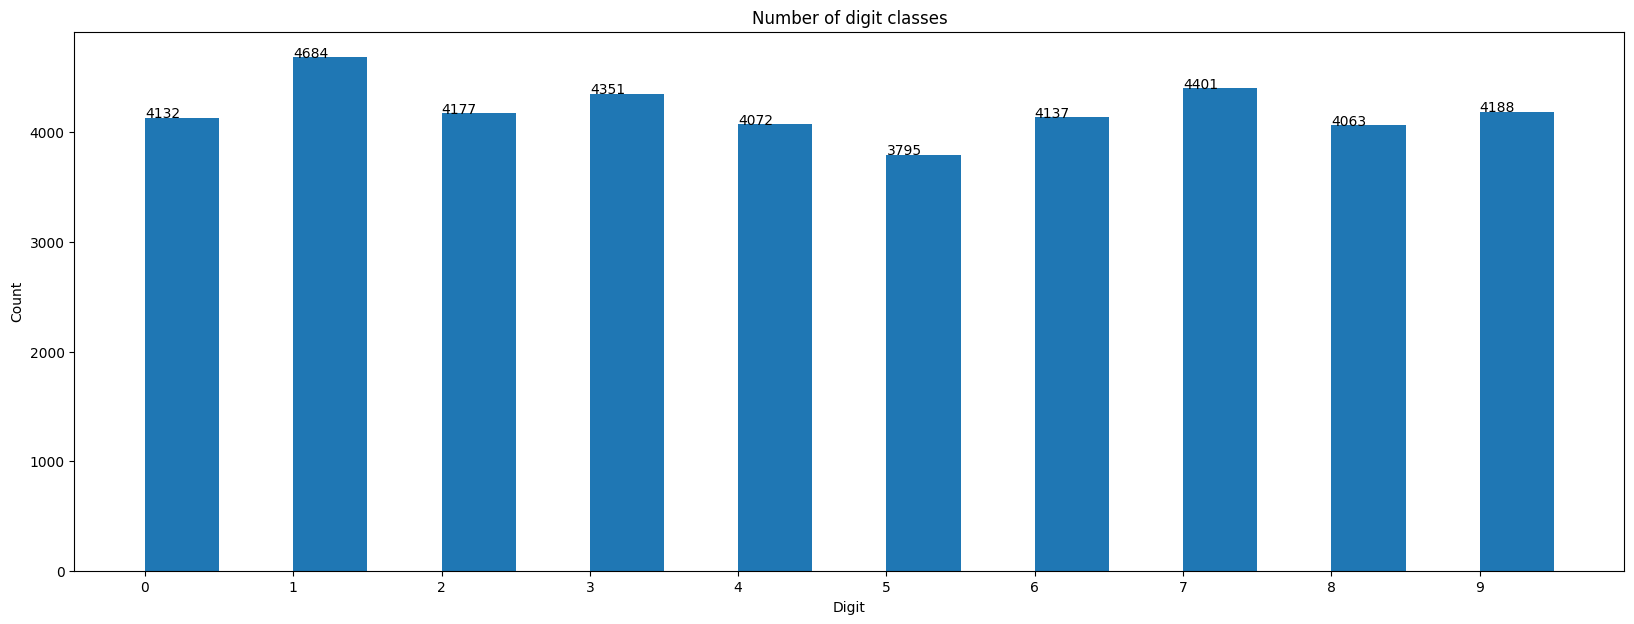

In [6]:
# helper function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
digit_cnt_dict = y_train_full.value_counts().to_dict()
keys = list(digit_cnt_dict.keys())
sorted_digit_cnt_dict = {i: digit_cnt_dict[i] for i in sorted(keys)}

# visualize number of digits classes in the training data
plt.figure(figsize=(20,7))
# plt.axes(xlim=(0, 9), ylim=(0, 5000))
plt.xticks(range(10))

plt.bar(sorted_digit_cnt_dict.keys(), sorted_digit_cnt_dict.values(), align='edge', width=0.5)
addlabels(list(sorted_digit_cnt_dict.keys()), list(sorted_digit_cnt_dict.values()))

# set the titles of the plot and axes
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Number of digit classes")

# show and close the figure
plt.show()
plt.close()

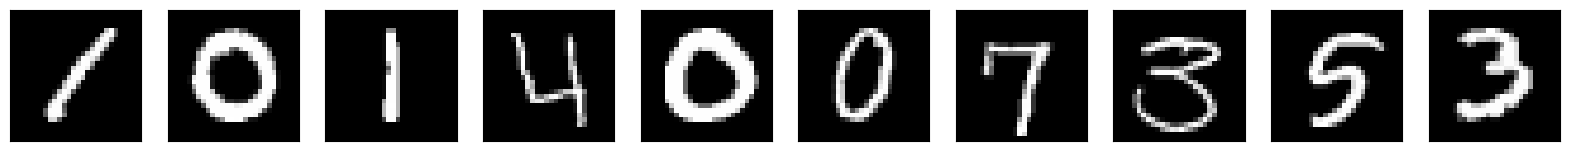

In [7]:
# The following block of code displays some images in the training data

# Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    img = X_train_full.iloc[i].to_numpy()
    img = img.reshape(28, 28)
    plt.imshow(img)

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# show and close the figure
plt.show()
plt.close()

In [9]:
def show_digits(digit, dataset=X_train_full):
    if digit in range(10):
        digit_indices = np.where(y_train_full == digit)[0]
        
        for i in range(50):  # Display the first 50 images of the digit
            plt.subplot(5, 10, i + 1)
            imdata = dataset.iloc[digit_indices[i]].values.reshape(28, 28)
            plt.imshow(imdata, cmap='gray')
            plt.xticks([])
            plt.yticks([])

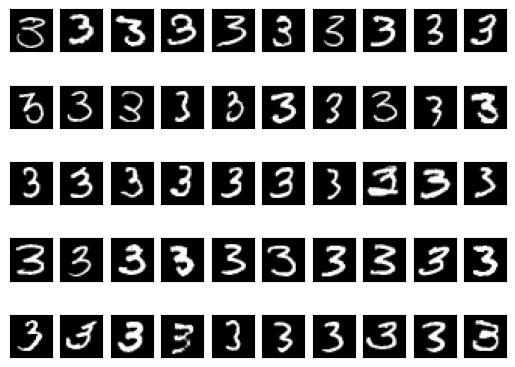

In [10]:
show_digits(3)

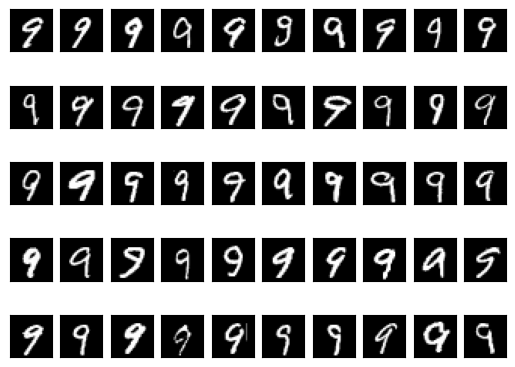

In [11]:
show_digits(9)

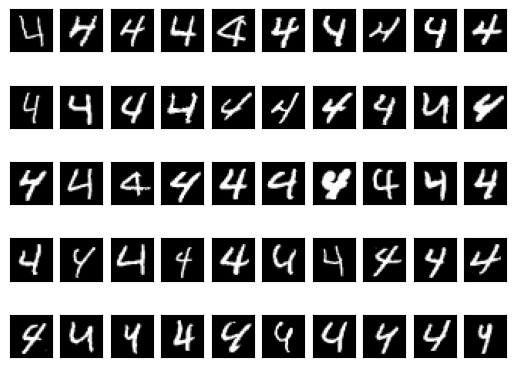

In [12]:
show_digits(4)

# 2. Data Processing <a name="data-processing"></a>

In this section, we perform some basic data processing to maximize the training efficiency. This includes:
1. Normalization: perform a grayscale normalization (divide the pixel value by 255) to reduce the effect of illumination's differences. Furthermore, CNN works faster on normalized data.
2. Reshape: reshape all data to 28x28x1 3D matrices (from the original 28x28 dimension). Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
3. Label Encoding: we simply perform one-hot encoding for our digits, e.g. digit 3 corresponds to the vector $[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]$
4. Data Augmentation: To avoid overfitting problem, we need to expand artificially our handwritten digit dataset. To this end, we can alter the training data with small transformations to reproduce the variations of digit. For example, the number is not centered, or the scale is not the same (some who write with big/small numbers), or the image is rotated.

In [13]:
# Data normalization

X_train_full_norm = X_train_full / 255.0
print("x_train shape: ",X_train_full_norm.shape)

x_train shape:  (42000, 784)


In [14]:
# Reshape the images

X_train_full_norm = X_train_full_norm.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train_full_norm.shape)

x_train shape:  (42000, 28, 28, 1)


In [15]:
# one-hot encoding the labels

y_train_full_one_hot = to_categorical(y_train_full, num_classes = 10)

In [16]:
# split the train and validation sets from the full training set

X_train_norm, X_val_norm, y_train, y_val = train_test_split(X_train_full_norm, y_train_full_one_hot, 
                                                            test_size = 0.2, random_state=42)
print("x_train shape",X_train_norm.shape)
print("x_test shape",X_val_norm.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (33600, 28, 28, 1)
x_test shape (8400, 28, 28, 1)
y_train shape (33600, 10)
y_test shape (8400, 10)


In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train_norm)

# 3. Build the Model <a name="modeling"></a>

In this section, we build a Convolutional Neural Network (CNN) which is a popular model for image classification and object detection in general. A comprehensive guide on CNN can be found [here](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53).

In [18]:
model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [19]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [20]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0

In [22]:
epochs = 30
batch_size = 300

In [23]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train_norm,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val_norm,y_val), 
                              steps_per_epoch=X_train_norm.shape[0] // batch_size)

Epoch 1/20
112/112 [==============================] - 13s 100ms/step - loss: 1.2610 - accuracy: 0.5697 - val_loss: 0.2919 - val_accuracy: 0.9267
Epoch 2/20
112/112 [==============================] - 12s 105ms/step - loss: 0.5180 - accuracy: 0.8335 - val_loss: 0.1441 - val_accuracy: 0.9594
Epoch 3/20
112/112 [==============================] - 11s 99ms/step - loss: 0.3629 - accuracy: 0.8844 - val_loss: 0.1098 - val_accuracy: 0.9679
Epoch 4/20
112/112 [==============================] - 11s 98ms/step - loss: 0.2995 - accuracy: 0.9063 - val_loss: 0.0886 - val_accuracy: 0.9756
Epoch 5/20
112/112 [==============================] - 11s 98ms/step - loss: 0.2670 - accuracy: 0.9175 - val_loss: 0.0823 - val_accuracy: 0.9757
Epoch 6/20
112/112 [==============================] - 12s 107ms/step - loss: 0.2430 - accuracy: 0.9245 - val_loss: 0.0749 - val_accuracy: 0.9776
Epoch 7/20
112/112 [==============================] - 11s 97ms/step - loss: 0.2194 - accuracy: 0.9328 - val_loss: 0.0717 - val_accura

# 4. Evaluate The Model <a name="evaluating"></a>

In this section, we evaluate the performance of our model by computing the accuracy score on the test set, plot the train and test loss, and visualize the confusion matrix.

In [24]:
# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_val_norm, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

In [25]:
y_pred

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [26]:
predicted_class = np.argmax(y_pred, axis = 1)
predicted_class

array([8, 1, 9, ..., 3, 0, 9])

In [27]:
# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_val)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.9871428571428571


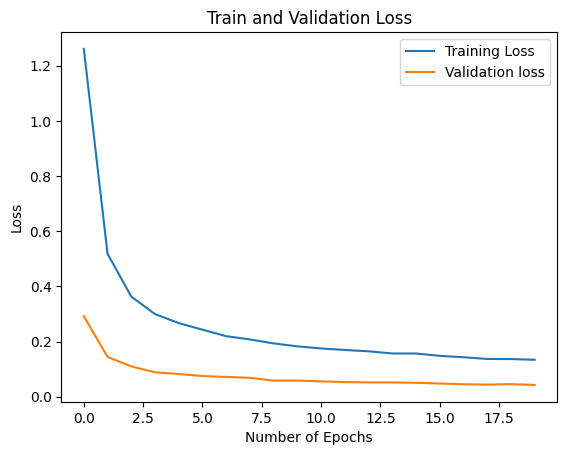

In [28]:
# Plot the loss and accuracy curves for training and validation

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Train and Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

263/263 [==============================] - 1s 5ms/step


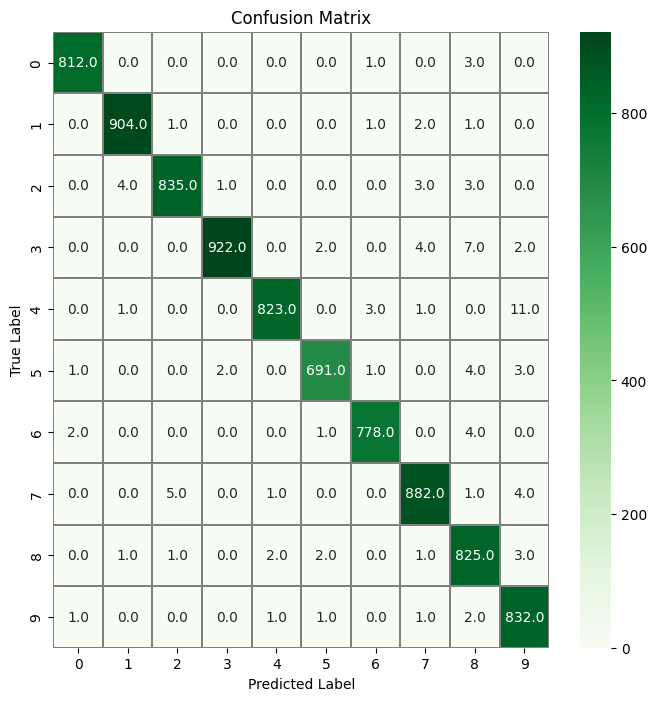

In [29]:
# draw the confusion matrix

# Predict the values from the validation dataset
y_pred = model.predict(X_val_norm)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 

# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 5. Submission <a name="submission"></a>

In this section, we run our model on the hidden test set and extract the submission file.

In [30]:
# Normalize the test set

test_norm = test / 255.0
print("test shape: ",test_norm.shape)

test shape:  (28000, 784)


In [31]:
# Reshape the images in the test set

test_norm = test_norm.values.reshape(-1,28,28,1)
print("test shape: ",test_norm.shape)

test shape:  (28000, 28, 28, 1)


In [32]:
# Compute the labels using the defined model

y_pred_probs_final = model.predict(test_norm, verbose=0)
y_pred_final = np.where(y_pred_probs_final > 0.5, 1, 0)

In [33]:
predicted_class_final = np.argmax(y_pred_final, axis = 1)
predicted_class_final

array([2, 0, 9, ..., 3, 9, 2])

In [34]:
# Extract the lables and the csv file for submission

results = pd.Series(predicted_class_final, name = "Label")
results

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [35]:
submission = pd.concat([pd.Series(range(1, 28001), name = "ImageId"), results], axis = 1)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [36]:
submission.to_csv("submission.csv", index = False)

# 6. Next Steps <a name="next-step"></a>

An obvious next step is to alternate the parameters used to implement the CNN model. For example, perhaps it is worthwhile to try the LeNet Implementation. For the sake of learning, it may be beneficial to compare the performance between different implementations.